In [29]:
import pandas as pd
import os
import pandas as pd
import matplotlib.pyplot as plt
import os
import geopandas as gpd
import contextily as cx
import seaborn as sns

for csv_file in os.listdir("./data_clean"):
    if csv_file[-3:] == "csv":
        globals()[csv_file[:-4]] = pd.read_csv("./data_clean/" + csv_file)

In [30]:
new_routes = pd.read_csv("new_routes.csv")

In [31]:
new_routes

,Unnamed: 0,truck_id,duration,fill_volume,n_units,orders,frow_warehouse,route_date,stops,total_distance
0,0,NaN,NaN,13.6192,273.0,A2nm2jbne7RScEwyP9afvh > 29nwqJyokudc2UbwNgmWF...,Avignon,2021-01-04,Avignon > Avignon > Nîmes > Montpellier > Mars...,944.639
1,0,NaN,NaN,32.7064,258.0,SaSjshXMYZZKendwS8GoVE > d38YugvixtjfCq7j6rFqb...,Cergy,2021-01-04,Cergy > Colombes > Carrières-sur-Seine > Clich...,70.089
2,1,NaN,NaN,67.4226,858.0,UeVqLAt9h6sfuB9AwC3iwD > XwTJK8CWCBpyKWWmxnYcg...,Cergy,2021-01-04,Cergy > Beauvais > Amiens > Calais > Rouen > C...,1397.294
3,0,NaN,NaN,27.3693,303.0,gNvydNYZyX6aS2b5FC5uVZ > nAkUcqNLXBSCVv35brwvW...,Montauban,2021-01-04,Montauban > Niort > Bordeaux > Mérignac > Pau ...,1111.737
4,0,NaN,NaN,7.5616,176.0,BFeQcFwLa8NRVPThkBhETw > ezJsG9YmgJLuaUjGk6BYm...,Reims,2021-01-04,Reims > Nancy > Épinal > Mulhouse > Strasbourg...,992.276
...,...,...,...,...,...,...,...,...,...,...
4720,3,NaN,NaN,47.5010,260.0,T3UsAYMMPm3bbF64bWVSzq > Ld3RBMuHw9WkWEjCHkpSM...,Montauban,2021-06-29,Montauban > Montauban > Perpignan > Toulouse,393.899
4721,0,NaN,NaN,46.7156,52.0,m6HfEPhtJqUJhmzcXVUgqU > hPprLnaXyXdq8oGCZE9kAp,Reims,2021-06-29,Reims > Nancy,338.362
4722,1,NaN,NaN,70.5088,109.0,UN8nN2SdNhLiA3KL3d5hBW > PsTgFSDCcyYdi2ciU4CSY...,Reims,2021-06-29,Reims > Épinal > Belfort,556.125
4723,2,NaN,NaN,79.7684,654.0,XrZDE8Vcc37yYYYQoAzscM > HvKeDYexqrob9BNnDWHTD...,Reims,2021-06-29,Reims > Reims > Troyes > Dijon > Besançon > Mu...,1108.170


# Taux de remplissage

In [32]:
routes["fill_rate"] = routes["fill_volume"] / 81.25
new_routes["fill_rate"] = new_routes["fill_volume"] / 81.25

In [33]:
routes

,Unnamed: 0,truck_id,duration,fill_volume,n_units,orders,from_warehouse,route_date,stops,total_distance,fill_rate
0,0,jehwGBpNg2rDLeKoYeiaLs,2.167136,5.9879,87.0,nK4iPf8nrGA9yivRH66ehS > jnsH9ndQ3UKcWSbb2UMkFn,Clermont-Ferrand,2021-01-02,Clermont-Ferrand > Bourges,153.950611,0.073697
1,1,XnzFnkALW3tLnzrdCVFyKH,23.230412,4.7060,190.0,XHfAWaLxTFbo5UQwtd7CMz > Wd6rPc4wPRNmt3ruf3F7o...,Cergy,2021-01-02,Cergy > Saint-Nazaire > Saint-Denis > Rouen > ...,1416.184102,0.057920
2,2,dwQ5Xd6TwcXURBczFdRXVy,6.995822,10.9609,148.0,gQi59MNfDa5YFpVWxfmPin > FaqH6N2zWCeykLh5f9VPW...,Cergy,2021-01-02,Cergy > Boulogne-Billancourt > Aubervilliers >...,184.704129,0.134903
3,3,A58tMgZVPfe2ucEBcCSXTW,4.785198,1.8904,79.0,7bzBdqUKWXyNrAhntXNrBq > BZsYUHDe4eVj7HaeM8MBt7,Reims,2021-01-02,Reims > Épinal > Troyes,390.851862,0.023266
4,4,KRNfDAmUV8bRzkxhdAYfkj,4.413343,0.4536,63.0,DfN8XqUVeVHjTW3Pat76Tr > MUT2TaTikTsi8FzSCnimxv,Clermont-Ferrand,2021-01-03,Clermont-Ferrand > Villeurbanne,139.447356,0.005583
...,...,...,...,...,...,...,...,...,...,...,...
7421,7421,4q43tx2jAeJtMFz4UwGZpD,1.150110,68.8800,41.0,JXpxeURRDzSAgeE5FiPh7H,Montauban,2021-06-29,Montauban > Pessac,180.534974,0.847754
7422,7422,kRYyBXN9TeJF8Mewj55RdU,8.596979,69.6117,95.0,EpgfunMiFtk37q3hniS8Te > Cujg8Rgb8uvYWtSzA4y4a...,Montauban,2021-06-29,Montauban > Pessac > Perpignan > Pau,821.990387,0.856759
7423,7423,9LBChivrfyZZrBMpcjLtGv,21.367729,49.4855,307.0,bRay4XPtfJtqcfu9PcfHUN > Tn3ehPUBELhd3JxMPSD6f...,Montauban,2021-06-29,Montauban > Niort > Mérignac > Montauban > Lim...,1034.651961,0.609052
7424,7424,YjL2avoUgG3tdDxditdH5V,1.651791,79.3388,41.0,S254SKuGaFfScnCCyAUfWk > 9pvVqJzgLFF2PcypNjAc5V,Montauban,2021-06-29,Montauban > La Rochelle,308.878633,0.976478


Text(0.5, 1.0, 'Distribution des taux de remplissage des camions')

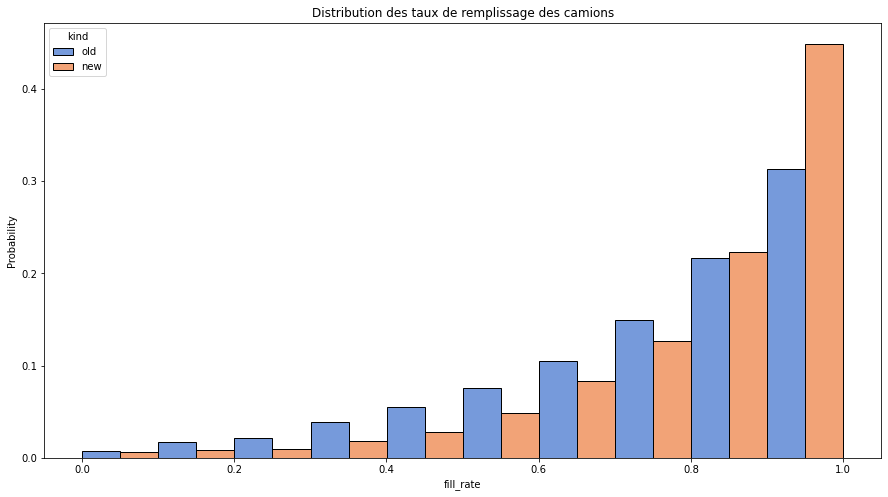

In [67]:
df_rates = pd.DataFrame(dict(fill_rate=routes.fill_rate, from_warehouse=routes.from_warehouse, kind=["old"]*len(routes))).append(
    pd.DataFrame(dict(fill_rate=new_routes.fill_rate, from_warehouse=new_routes.frow_warehouse, kind=["new"]*len(new_routes)))).reset_index()
plt.figure(figsize=(15,8))
sns.histplot(x="fill_rate", hue="kind", data=df_rates, stat="probability", multiple="dodge", common_norm=False, bins=10, palette=sns.color_palette("muted")[:2])
plt.title("Distribution des taux de remplissage des camions")

In [71]:
(df_rates.groupby(["from_warehouse", "kind"]).agg("mean")[["fill_rate"]].T*100).astype(int)

from_warehouse Avignon     Cergy     Clermont-Ferrand     Montauban     Reims  \
kind               new old   new old              new old       new old   new   
fill_rate           79  74    87  77               64  67        74  73    79   

from_warehouse      
kind           old  
fill_rate       74

# Distances pacourues

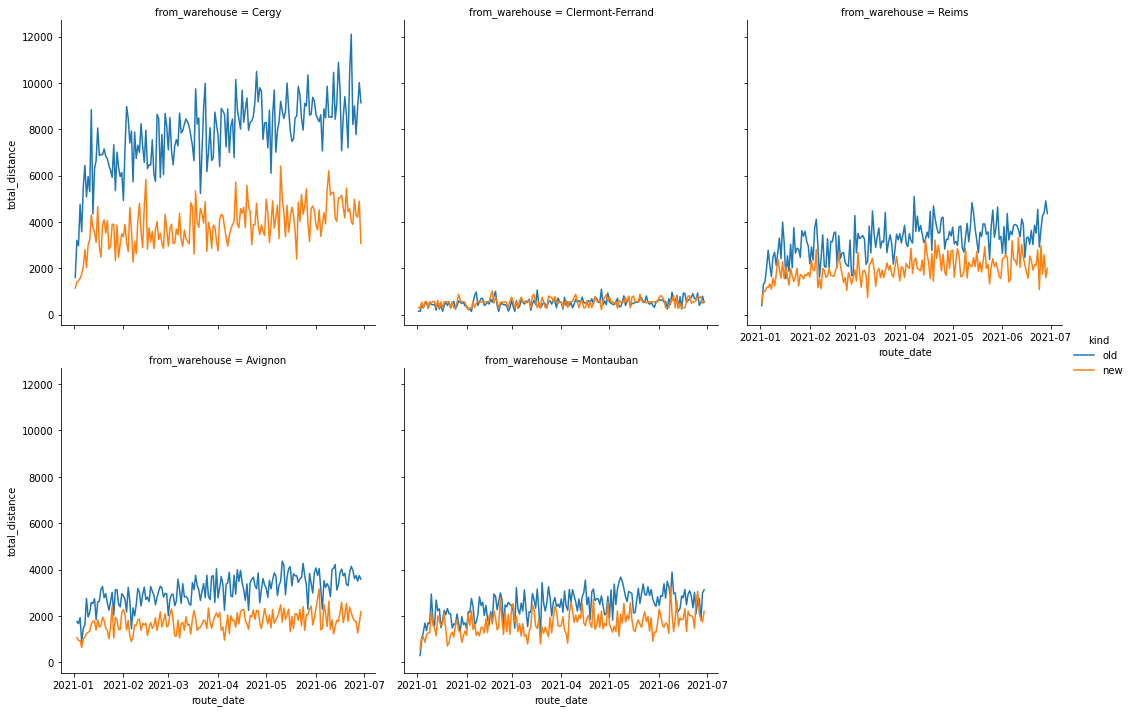

In [63]:
df1 = routes[["route_date", "total_distance", "from_warehouse"]].groupby(["route_date", "from_warehouse"]).agg("sum").reset_index()
df1["kind"] = "old"
df2 = new_routes[["route_date", "total_distance", "frow_warehouse"]].groupby(["route_date", "frow_warehouse"]).agg("sum").reset_index()
df2["kind"] = "new"
df2["from_warehouse"] = df2["frow_warehouse"]

distances = df1.append(df2).drop("frow_warehouse", axis=1)

distances["route_date"] = pd.to_datetime(distances["route_date"])

g = sns.FacetGrid(distances, col="from_warehouse", hue="kind", col_wrap=3, height=5)
g.map(sns.lineplot, "route_date", "total_distance")
g.add_legend()

In [74]:
routes["total_distance"].sum()

3063971.6525546503

In [75]:
new_routes["total_distance"].sum()

1752143.29

In [76]:
routes["total_distance"].sum() - new_routes["total_distance"].sum()

1311828.3625546503

In [77]:
(routes["total_distance"].sum() - new_routes["total_distance"].sum()) / routes["total_distance"].sum()

0.4281463770922574